In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the boston house pricing dataset

In [4]:
from sklearn.datasets import fetch_openml 
boston = fetch_openml(name='boston', version=1)

In [5]:
print(type(boston))

<class 'sklearn.utils._bunch.Bunch'>


In [6]:
## checking the decription of the dataset
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [7]:
boston.data = boston.data.to_numpy()
print(boston.data)

[[0.00632 18.0 2.31 ... 15.3 396.9 4.98]
 [0.02731 0.0 7.07 ... 17.8 396.9 9.14]
 [0.02729 0.0 7.07 ... 17.8 392.83 4.03]
 ...
 [0.06076 0.0 11.93 ... 21.0 396.9 5.64]
 [0.10959 0.0 11.93 ... 21.0 393.45 6.48]
 [0.04741 0.0 11.93 ... 21.0 396.9 7.88]]


In [8]:
print(boston.target)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [9]:
print(boston.feature_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


# preparing the dataset

In [10]:
dataset = pd.DataFrame(boston.data)
# dataset.index = dataset.index.astype(str)

In [11]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.9,5.33


In [12]:
dataset['PRICE']=boston.target

In [13]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.9,5.33,36.2


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    object 
 1   1       506 non-null    object 
 2   2       506 non-null    object 
 3   3       506 non-null    object 
 4   4       506 non-null    object 
 5   5       506 non-null    object 
 6   6       506 non-null    object 
 7   7       506 non-null    object 
 8   8       506 non-null    object 
 9   9       506 non-null    object 
 10  10      506 non-null    object 
 11  11      506 non-null    object 
 12  12      506 non-null    object 
 13  PRICE   506 non-null    float64
dtypes: float64(1), object(13)
memory usage: 55.5+ KB


In [15]:
## Summarizing the data
dataset.describe()

,PRICE
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


In [16]:
## check the missing values
dataset.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
PRICE    0
dtype: int64

# EDA

In [17]:
## correlation
dataset.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [41]:
import seaborn as sns

In [42]:
##sns.pairplot(dataset)

In [43]:
# sns.regplot(x="RM",y="PRICE",data=dataset)

In [44]:
# sns.regplot(x="LSTAT",y="PRICE",data=dataset)

In [45]:
## Independent and dependent features
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [46]:
# train test split


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [48]:
## standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [49]:
print(X_train)

           0     1      2  3      4      5     6       7   8      9    10  \
5    0.02985   0.0   2.18  0  0.458   6.43  58.7  6.0622   3  222.0  18.7   
116  0.13158   0.0  10.01  0  0.547  6.176  72.5  2.7301   6  432.0  17.8   
45   0.17142   0.0   6.91  0  0.448  5.682  33.8  5.1004   3  233.0  17.9   
16   1.05393   0.0   8.14  0  0.538  5.935  29.3  4.4986   4  307.0  21.0   
468  15.5757   0.0   18.1  0   0.58  5.926  71.0  2.9084  24  666.0  20.2   
..       ...   ...    ... ..    ...    ...   ...     ...  ..    ...   ...   
106   0.1712   0.0   8.56  0   0.52  5.836  91.9   2.211   5  384.0  20.9   
270  0.29916  20.0   6.96  0  0.464  5.856  42.1   4.429   3  223.0  18.6   
348  0.01501  80.0   2.01  0  0.435  6.635  29.7   8.344   4  280.0  17.0   
435  11.1604   0.0   18.1  0   0.74  6.629  94.6  2.1247  24  666.0  20.2   
102  0.22876   0.0   8.56  0   0.52  6.405  85.4  2.7147   5  384.0  20.9   

         11     12  
5    394.12   5.21  
116   393.3  12.04  
45    396.9 

In [50]:
X_train=scaler.fit_transform(X_train)

In [51]:
X_test=scaler.transform(X_test)

# Model training

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
reg = LinearRegression()

In [54]:
reg.fit(X_train,y_train)

LinearRegression()

In [55]:
print(reg.coef_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]


In [56]:
print(reg.intercept_)

23.01581920903955


In [57]:
## on which parameters model is trained
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [58]:
##prediction with test data
reg_pred = reg.predict(X_test)

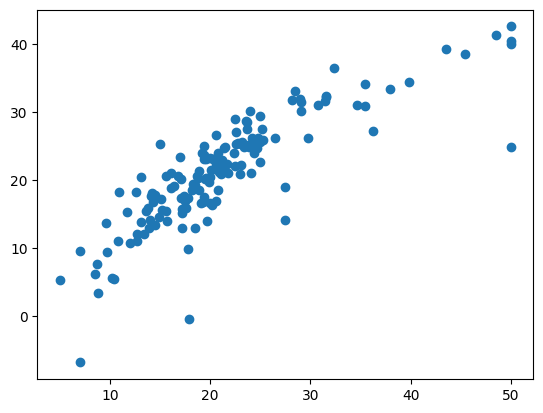

In [59]:
## ploat a scatter plot 
plt.scatter(y_test,reg_pred)

In [60]:
residuals = y_test - reg_pred

In [61]:
residuals


173    -5.048960
274    -4.095014
491    -1.811193
72     -2.603213
452    -2.755280
         ...    
441    -0.303672
23      1.114059
225    10.016575
433    -2.382863
447    -5.685618
Name: PRICE, Length: 152, dtype: float64

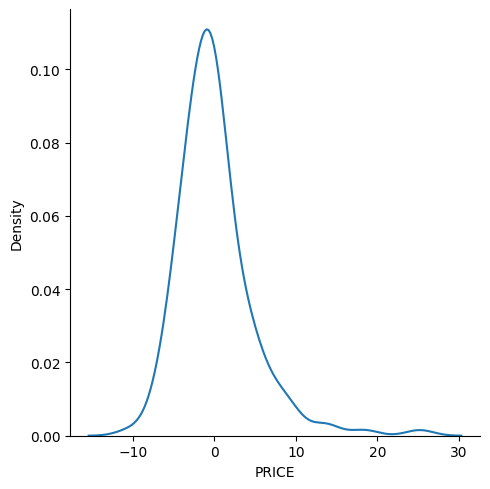

In [62]:
## plot the residuals
sns.displot(residuals,kind="kde")

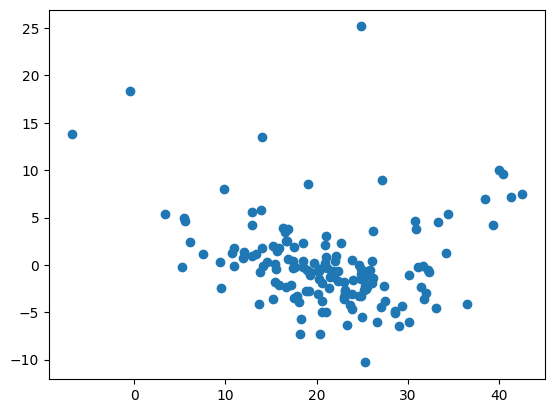

In [63]:
# scatter plot with respect to prediction and residuals
#uniform distribution
plt.scatter(reg_pred,residuals)

In [64]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [65]:
print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))


3.1627098714574053
21.517444231177205


# Rsquare and adjusted R square

R^2 = 1-SSR/sst

Adjusted R@ = 1-[(1-R2)*(n-1)/(n-k-1)]

In [66]:
from sklearn.metrics import r2_score

In [67]:
score = r2_score(y_test,reg_pred)
print(score)

0.7112260057484934


In [68]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6840226584639312

## New Data Prediction

In [69]:
boston.data[0].shape

(13,)

In [70]:
boston.data[0].reshape(1,-1)

array([[0.00632, 18.0, 2.31, '0', 0.538, 6.575, 65.2, 4.09, '1', 296.0,
        15.3, 396.9, 4.98]], dtype=object)

In [71]:
## transformation of new data
reg.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([30.08649576])

## pickling the model file for deployment

In [72]:
import pickle

In [73]:
pickle.dump(reg,open('regmodel.pkl','wb'))

In [74]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [75]:
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

array([30.08649576])